In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats
import seaborn as sms

In [2]:
data = pd.read_csv("link_status_search_with_ordering_real.csv", on_bad_lines="skip")


In [3]:
user_data = pd.read_csv("distinct_users_from_search_table_real_map.csv")

In [4]:
# Define function for exponential fit. 
# See power-law degree distribution on lecture material 4.
def expFit(x, a, b):
    return a * x ** (-b)

In [5]:
def fit_draw_exp(x, y, xlabel, ylabel, title, xrange):
    """ find parameters for exponential fit
    """
    params_exp, cov_exp = scipy.optimize.curve_fit(expFit, x, y)
    a, b = params_exp
    print("a={}, b={}".format(a, b))

    plt.scatter(x, y)
    plt.plot(x, expFit(x, a, b), "r--")
    plt.xlim(xrange)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

In [6]:
def piecewise_linear(x, x0, y0, k1, k2):
    """ Code from https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python.
    """
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

def fit_draw_lin2(x, y, xlabel, ylabel, title, **kwargs):
    param_lin, cov_lin = scipy.optimize.curve_fit(piecewise_linear, x, y, **kwargs)
    print("x0={}, y0={}, k1={}, k2={}".format(*param_lin))

    plt.scatter(x, y)
    plt.plot(x, piecewise_linear(x, *param_lin), "red")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

In [7]:
def piecewise_linear3(x, x0, x1, y0, k1, k2, k3):
    """ Adapted from https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python.
    """
    return np.piecewise(x, [x < x0, np.logical_and(x>x0, x<x1)], 
        [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0, lambda x: k3*x + (k2*x1 + y0-k2*x0)-k3*x1]
        )

def fit_draw_lin3(x, y, xlabel, ylabel, title, **kwargs):
    param_lin, cov_lin = scipy.optimize.curve_fit(piecewise_linear3, x, y, **kwargs)
    print("x0={}, x1={}, y0={}, k1={}, k2={}, k3={}".format(*param_lin))

    plt.scatter(x, y)
    plt.plot(x, piecewise_linear3(x, *param_lin), "red")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

**Task 3**

In [8]:
tweets_by_user = data.groupby(by="user_id").size()
users_by_amounts_of_tweets = tweets_by_user.value_counts().sort_index()
y = (users_by_amounts_of_tweets / users_by_amounts_of_tweets.sum()).to_numpy()
x = np.array(users_by_amounts_of_tweets.index.to_list())
ylog = np.log10(y)
xlog = np.log10(x)


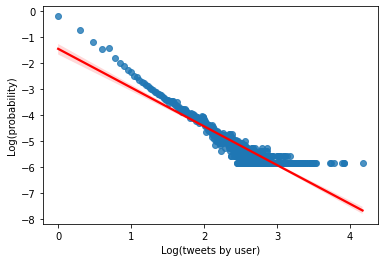

In [9]:
ax = sms.regplot(x=xlog, y=ylog, ci=95, line_kws={"color":"red"})
ax.set_ylabel("Log(probability)")
ax.set_xlabel("Log(tweets by user)")
plt.show()

x0=2.6665193451329423, y0=-5.747508136624524, k1=-2.0417617025660397, k2=-0.16851246108190826


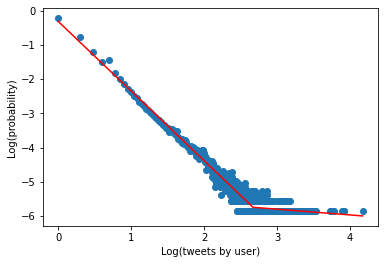

In [10]:
fit_draw_lin2(xlog, ylog, "Log(tweets by user)", "Log(probability)", None)

a=0.616004212772915, b=1.937152921968458


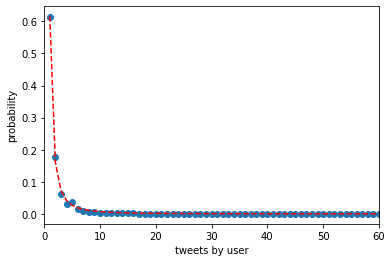

In [11]:
fit_draw_exp(x, y, "tweets by user", "probability", None,(0, 60))

In [12]:
x.max()

14803

In [13]:
x.size

750

**Task 4**

In [14]:
followers = user_data["indegree"].value_counts().sort_index().iloc[1:]
y = (followers / followers.sum()).to_numpy()
x = np.array(followers.index.to_list())
ylog = np.log10(y)
xlog = np.log10(x)

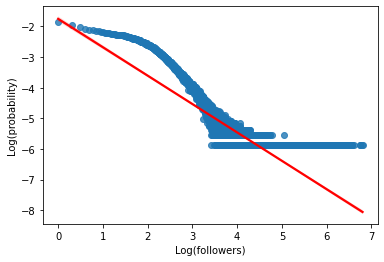

In [15]:
ax = sms.regplot(x=xlog, y=ylog, ci=95, line_kws={"color":"red"})
ax.set_ylabel("Log(probability)")
ax.set_xlabel("Log(followers)")
plt.show()

x0=2.4593695299215144, x1=3.8586092282747457, y0=-2.9762702338806206, k1=-0.6338727443230412, k2=-1.9902211833988477, k3=-0.08699388454393613


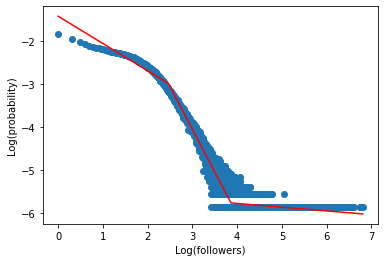

In [16]:
p = (2, 3.5, -2.1, -0.1, -1, -0.1)   # initial guess
fit_draw_lin3(xlog, ylog, "Log(followers)", "Log(probability)", None, p0=p)

In [17]:
x.max()

6312094

a=0.022026473511853793, b=0.6102497373788691


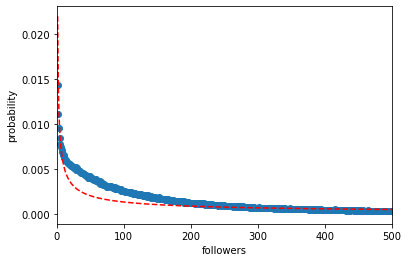

In [18]:
fit_draw_exp(x, y, "followers", "probability", None, (0, 500))

**Task 5**

In [19]:
followees = user_data["outdegree"].value_counts().sort_index().iloc[1:]
y = (followees / followees.sum()).to_numpy()
x = np.array(followees.index.to_list())
ylog = np.log10(y)
xlog = np.log10(x)

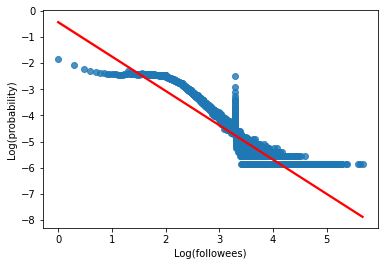

In [20]:
ax = sms.regplot(x=xlog, y=ylog, ci=95, line_kws={"color":"red"})
ax.set_ylabel("Log(probability)")
ax.set_xlabel("Log(followees)")
plt.show()

x0=2.485672877249935, x1=3.7199268571476027, y0=-2.8915413852557297, k1=-0.48042505581811745, k2=-2.301457489168407, k3=-0.16804601590925955


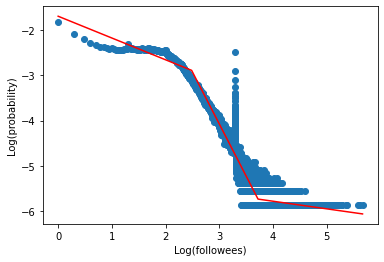

In [21]:
p = (2, 3.5, -2.1, -0.1, -1, -0.1)   # initial guess
fit_draw_lin3(xlog, ylog, "Log(followees)", "Log(probability)", None, p0=p)

In [22]:
x.max()

466085

a=0.017771406967637647, b=0.5805422681719807


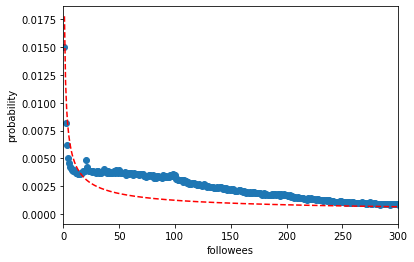

In [23]:
fit_draw_exp(x, y, "followees", "probability", None, (0, 300))

**Task 6**

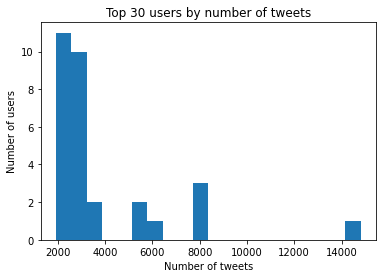

In [24]:
tweets_by_user = data.groupby(by="user_id").size().sort_values().rename("tweets")
top30 = tweets_by_user.tail(30).reset_index(drop=True)
plt.hist(top30, bins=20)
plt.xlabel("Number of tweets")
plt.ylabel("Number of users")
plt.title("Top 30 users by number of tweets")
plt.show()


**Task 10**

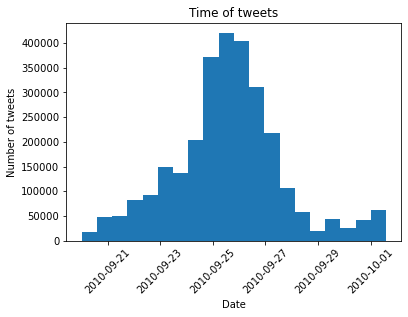

In [25]:
time = (pd.to_datetime(data["create_at_long"], unit="ms") + pd.Timedelta("-07:00:00"))

plt.hist(time, bins=20)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of tweets")
plt.title("Time of tweets")
plt.show()